# Introducción

Este notebook presenta un **Análisis Exploratorio de Datos (EDA)** sobre el conjunto de datos de **Cardiotocography (CTG)**,

Como parte del proyecto, se desarrolló la librería personalizada **`ctg_viz`**, que integra funciones de preprocesamiento, diagnóstico del dataset y visualización estandarizada. Con ella se llevan a cabo tareas de limpieza de datos, detección y tratamiento de outliers, clasificación de variables y generación de gráficos analíticos.

El objetivo principal es lograr una comprensión clara del comportamiento de las variables, identificar diferencias relevantes entre los grupos (`NSP` y `CLASS`) y establecer un flujo de análisis reproducible y profesional que sirva de base para etapas posteriores de modelado.

# Funciones principales de la librería `ctg_viz`

A continuación se resumen todas las funciones implementadas en la librería  utilizada para el análisis del dataset CTG.

## Funciones de preprocesamiento
- `drop_null_columns(df, threshold=0.2)`
  Elimina columnas que tienen más del porcentaje permitido de valores nulos.

- `simple_imputer(df, numeric_strategy="median", categorical_strategy="most_frequent")`
  Rellena valores faltantes: mediana para numéricas y valor más frecuente para categóricas.

- `remove_outliers_iqr(df, cols, factor=1.5)`
  Detecta y elimina outliers usando el rango intercuartílico (IQR) en las columnas indicadas.

## Funciones de diagnóstico
- `check_data_completeness_Pascual_Enrique_Juarez_Luna(df)` 
  Muestra un resumen de tipos de dato, nulos, ceros y columnas constantes del dataset.

- `classify_columns_ctg(df)`  
  Clasifica las columnas numéricas en:  
  - **Continuas:** más de 10 valores únicos  
  - **Discretas:** 10 o menos valores únicos

## Funciones de visualización (`ctg_viz.plots`)
- `plot_before_after` – Comparación antes/después de quitar outliers

- `plot_histogram_ctg` – Histogramas simples y agrupados  

- `plot_boxplot_ctg` – Boxplots por grupo (NSP, CLASS)  

- `plot_barh_ctg` – Barras horizontales ordenadas  

- `plot_line_ctg` – Serie temporal por índice  

- `plot_dotplot_ctg` – Dot plot simple o por grupo  

- `plot_density_ctg` – Curvas de densidad (KDE)  

- `plot_violin_ctg` – Violin plots con puntos superpuestos 

- `plot_heatmap_ctg` – Matriz de correlación  

# Importación de librerías y funciones del paquete

In [1]:
import pandas as pd
import numpy as np

from ctg_viz.preprocessing import (drop_null_columns, simple_imputer, remove_outliers_iqr)

from ctg_viz.utils import (check_data_completeness_Pascual_Enrique_Juarez_Luna)

from ctg_viz.plots import (plot_histogram_ctg, plot_before_after, plot_barh_ctg, plot_line_ctg, plot_dotplot_ctg,
 plot_density_ctg, plot_violin_ctg,plot_heatmap_ctg)

# Carga del dataset

In [2]:
df_raw = pd.read_csv("CTG.csv")
df_raw.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


# Preprocesamiento

## Eliminar columnas con más del 20% de valores nulos

In [3]:
print("Shape inicial:", df_raw.shape)

df_step1 = drop_null_columns(df_raw, threshold=0.2)

print("Shape después de eliminar columnas:", df_step1.shape)

Shape inicial: (2129, 40)
Shape después de eliminar columnas: (2129, 40)


## Imputar valores faltantes restantes

In [4]:
df_step2 = simple_imputer(df_step1, numeric_strategy="median", categorical_strategy="most_frequent")

df_step2.isna().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

## Detectar y tratar valores atípicos (outliers) con IQR

In [5]:
cols_outliers = ["LB", "ASTV", "ALTV", "MSTV", "MLTV","Width",
 "Min", "Max", "Mean", "Median", "Variance"]

print("Shape ANTES:", df_step2.shape)

df_step3 = remove_outliers_iqr(df_step2, cols=cols_outliers, factor=1.5)

print("Shape DESPUÉS:", df_step3.shape)

Shape ANTES: (2129, 40)
Shape DESPUÉS: (1522, 40)


## Efecto del IQR ANTES / DESPUÉS

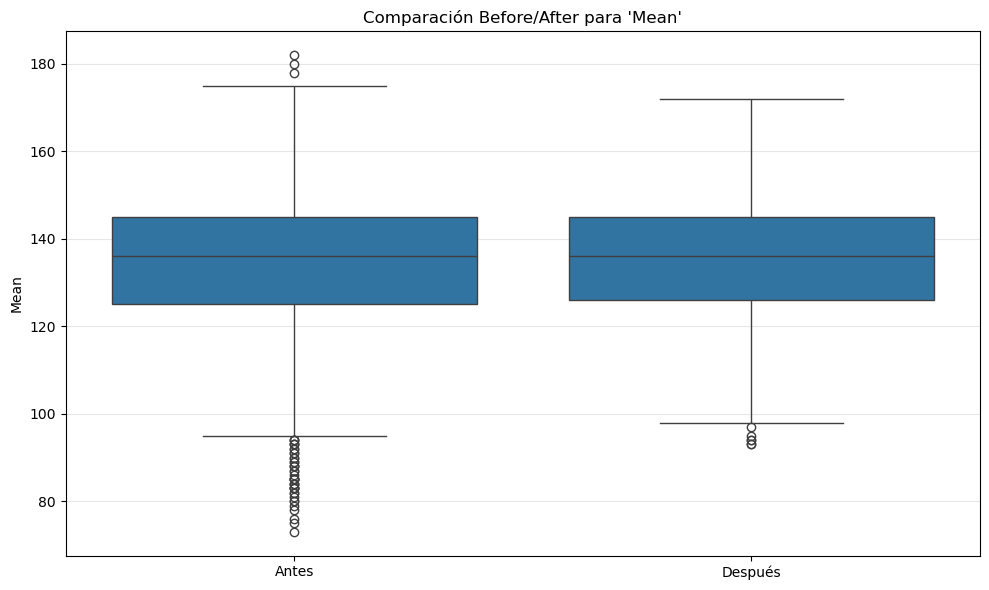

In [6]:
plot_before_after(df_before=df_step2, df_after=df_step3, col="Mean")

Observaciones:

- La mediana prácticamente no cambia entre el antes y después del filtrado, lo que indica que la tendencia central se mantiene estable.

- El IQR eliminó valores extremos sin alterar la forma general de la distribución.

- El resultado es una variable Mean más limpia y robusta, útil para los siguientes análisis.

# Análisis de Datos

## Crear una función general check_data_completeness_nombrecompleto(df) que retorne:
### - Conteo de nulos
### - Porcentaje de completitud
### - Tipo de dato
### - Estadísticos de dispersión

In [7]:
reporte_inicial = check_data_completeness_Pascual_Enrique_Juarez_Luna(df_raw)
reporte_inicial


========== RESUMEN GENERAL ==========
Shape del DataFrame: (2129, 40)

========== TIPOS DE DATOS ==========
FileName     object
Date         object
SegFile      object
b           float64
e           float64
LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

========== VALORES ÚNICOS POR COLUMNA ==========
FileName     352
Date      

## Clasificar automáticamente columnas en:
### - Continuas (más de 10 valores únicos y tipo numérico)
### - Discretas (menos de 10 valores únicos)

In [8]:
from ctg_viz.categorization import classify_columns_ctg

clasificacion = classify_columns_ctg(df_step3)

print("Continuas:\n", clasificacion["continuas"])
print("Discretas:\n", clasificacion["discretas"])

Continuas:
 ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'Width', 'Min', 'Max', 'Nmax', 'Mode', 'Mean', 'Median', 'Variance']
Discretas:
 ['DS', 'DP', 'DR', 'Nzeros', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


# Visualizaciones

## Histogramas: añadir línea de densidad + KDE + customizable por grupo

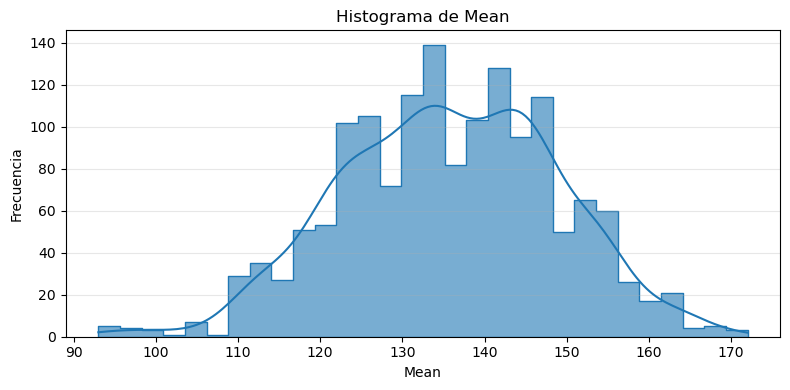

In [9]:
# 1. Histograma simple de Mean
plot_histogram_ctg(df=df_step3, column="Mean", bins=30, kde=True, density=False)

Observaciones:

- La distribución de Mean es unimodal y ligeramente sesgada a la derecha, aunque mantiene una forma general cercana a la normal.

- La mayor concentración de valores se ubica aproximadamente entre 125 y 150, donde se encuentra la mayor densidad.

- No se observan acumulaciones anormales ni discontinuidades, lo que indica que Mean es una variable estable y adecuada para análisis estadístico y modelado.

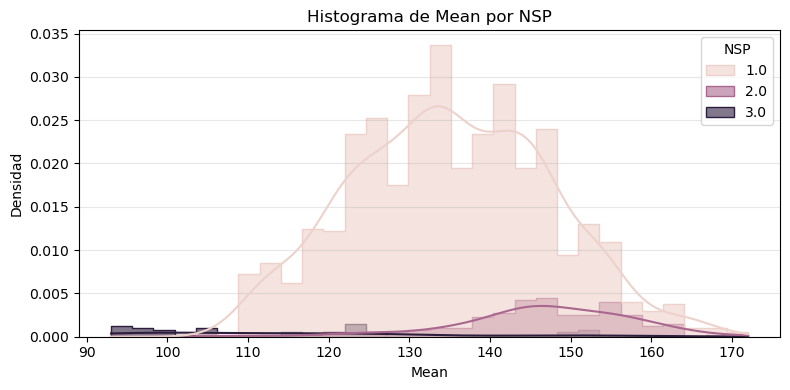

In [10]:
# 2. Histograma de Mean segmentado por NSP
plot_histogram_ctg(df=df_step3, column="Mean", by="NSP", bins=30, kde=True, density=True)

Observaciones:

- Las tres curvas tienen una sola zona donde se concentran los datos, aunque se observa que NSP 3.0 tiende a valores más bajos que NSP 1.0 y 2.0.

- NSP 3.0 también muestra más dispersión y menos concentración, lo que podría reflejar mayor variabilidad en ese grupo.

- Esta comparación por NSP deja ver diferencias claras en cómo se comporta la variable Mean, lo que puede ser útil para entender patrones y hacer análisis más enfocados.

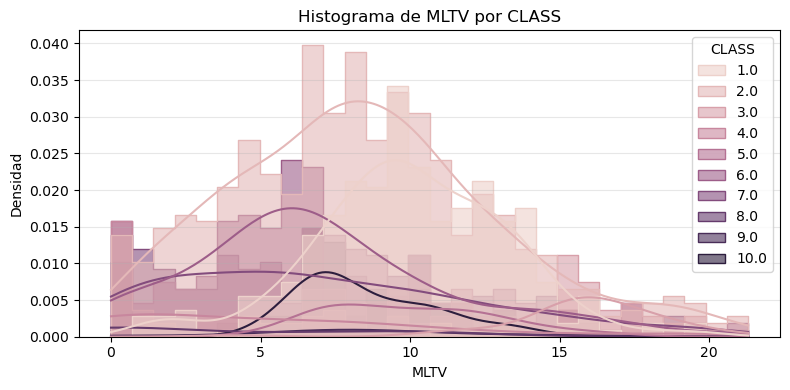

In [11]:
# 3. Histograma de MLTV segmentado por CLASS
plot_histogram_ctg(df=df_step3, column="MLTV", by="CLASS", bins=30, kde=True, density=True)

Observaciones:

- Las curvas muestran que la mayoría de las clases se agrupan en un rango similar de MLTV, aunque algunas como CLASS 6.0 y 8.0 se extienden hacia valores más altos.

- Hay diferencias en la forma y concentración de cada curva, lo que sugiere que MLTV no se distribuye igual en todas las clases.

- Esta visualización ayuda a detectar qué clases tienen comportamientos distintos, lo que puede ser útil para segmentar o ajustar modelos según el grupo.

## Boxplots: Incluir subgráficos por clase objetivo

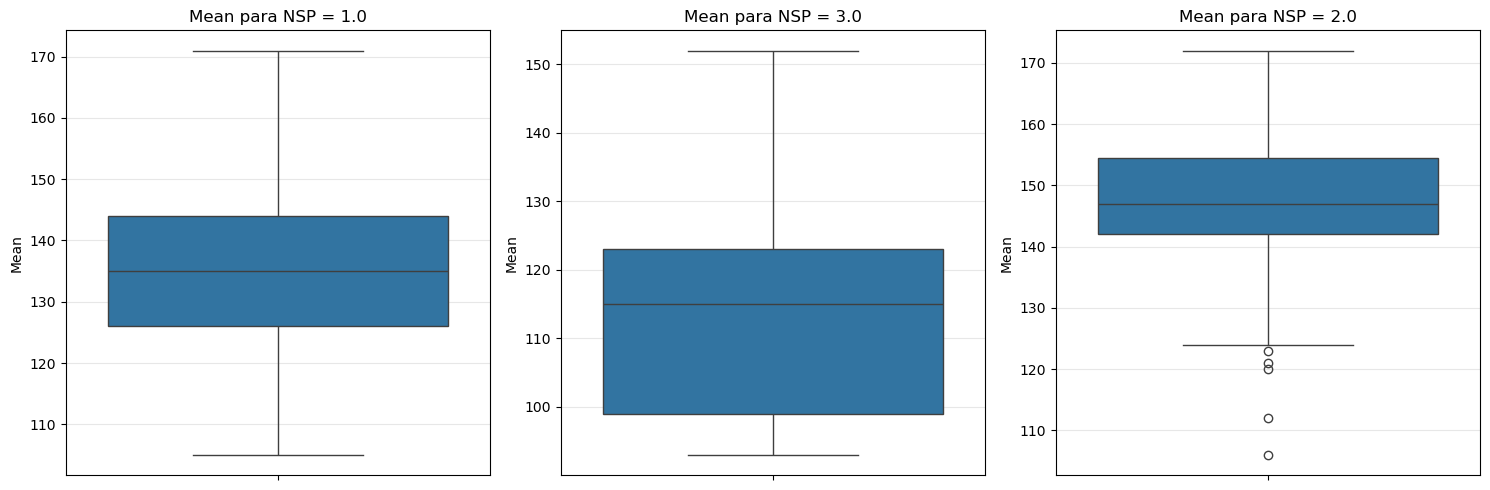

In [12]:
from ctg_viz.plots import plot_boxplot_ctg

plot_boxplot_ctg(df_step3, col="Mean", hue="NSP")

Observaciones:

- NSP 2.0 tiene la mediana más alta, seguida por NSP 1.0; NSP 3.0 se ubica claramente por debajo de ambas.

- NSP 3.0 también muestra menor rango y menos valores extremos, lo que podría indicar un comportamiento más concentrado.

- Esta comparación permite ver que la variable Mean varía de forma consistente según el tipo de NSP, lo que refuerza su relevancia para segmentar o explicar diferencias en el análisis.

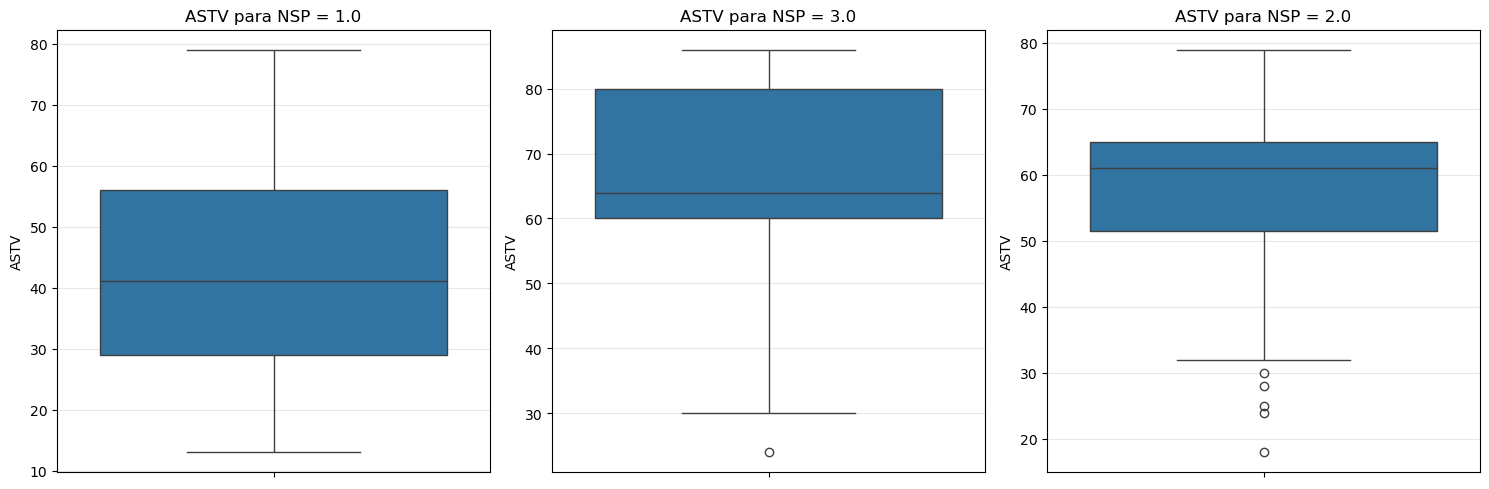

In [13]:
plot_boxplot_ctg(df_step3, col="ASTV",  hue="NSP")


Observaciones:

- NSP 3.0 y 2.0 tienen medianas de ASTV más altas que NSP 1.0, lo que sugiere mayor actividad en esos grupos.
 
- NSP 1.0 muestra más dispersión y valores bajos, mientras que NSP 2.0 tiene varios outliers por debajo de 35.

- Estas diferencias en ASTV según NSP pueden ayudar a entender mejor el comportamiento de cada grupo y aportar al análisis clínico o predictivo.

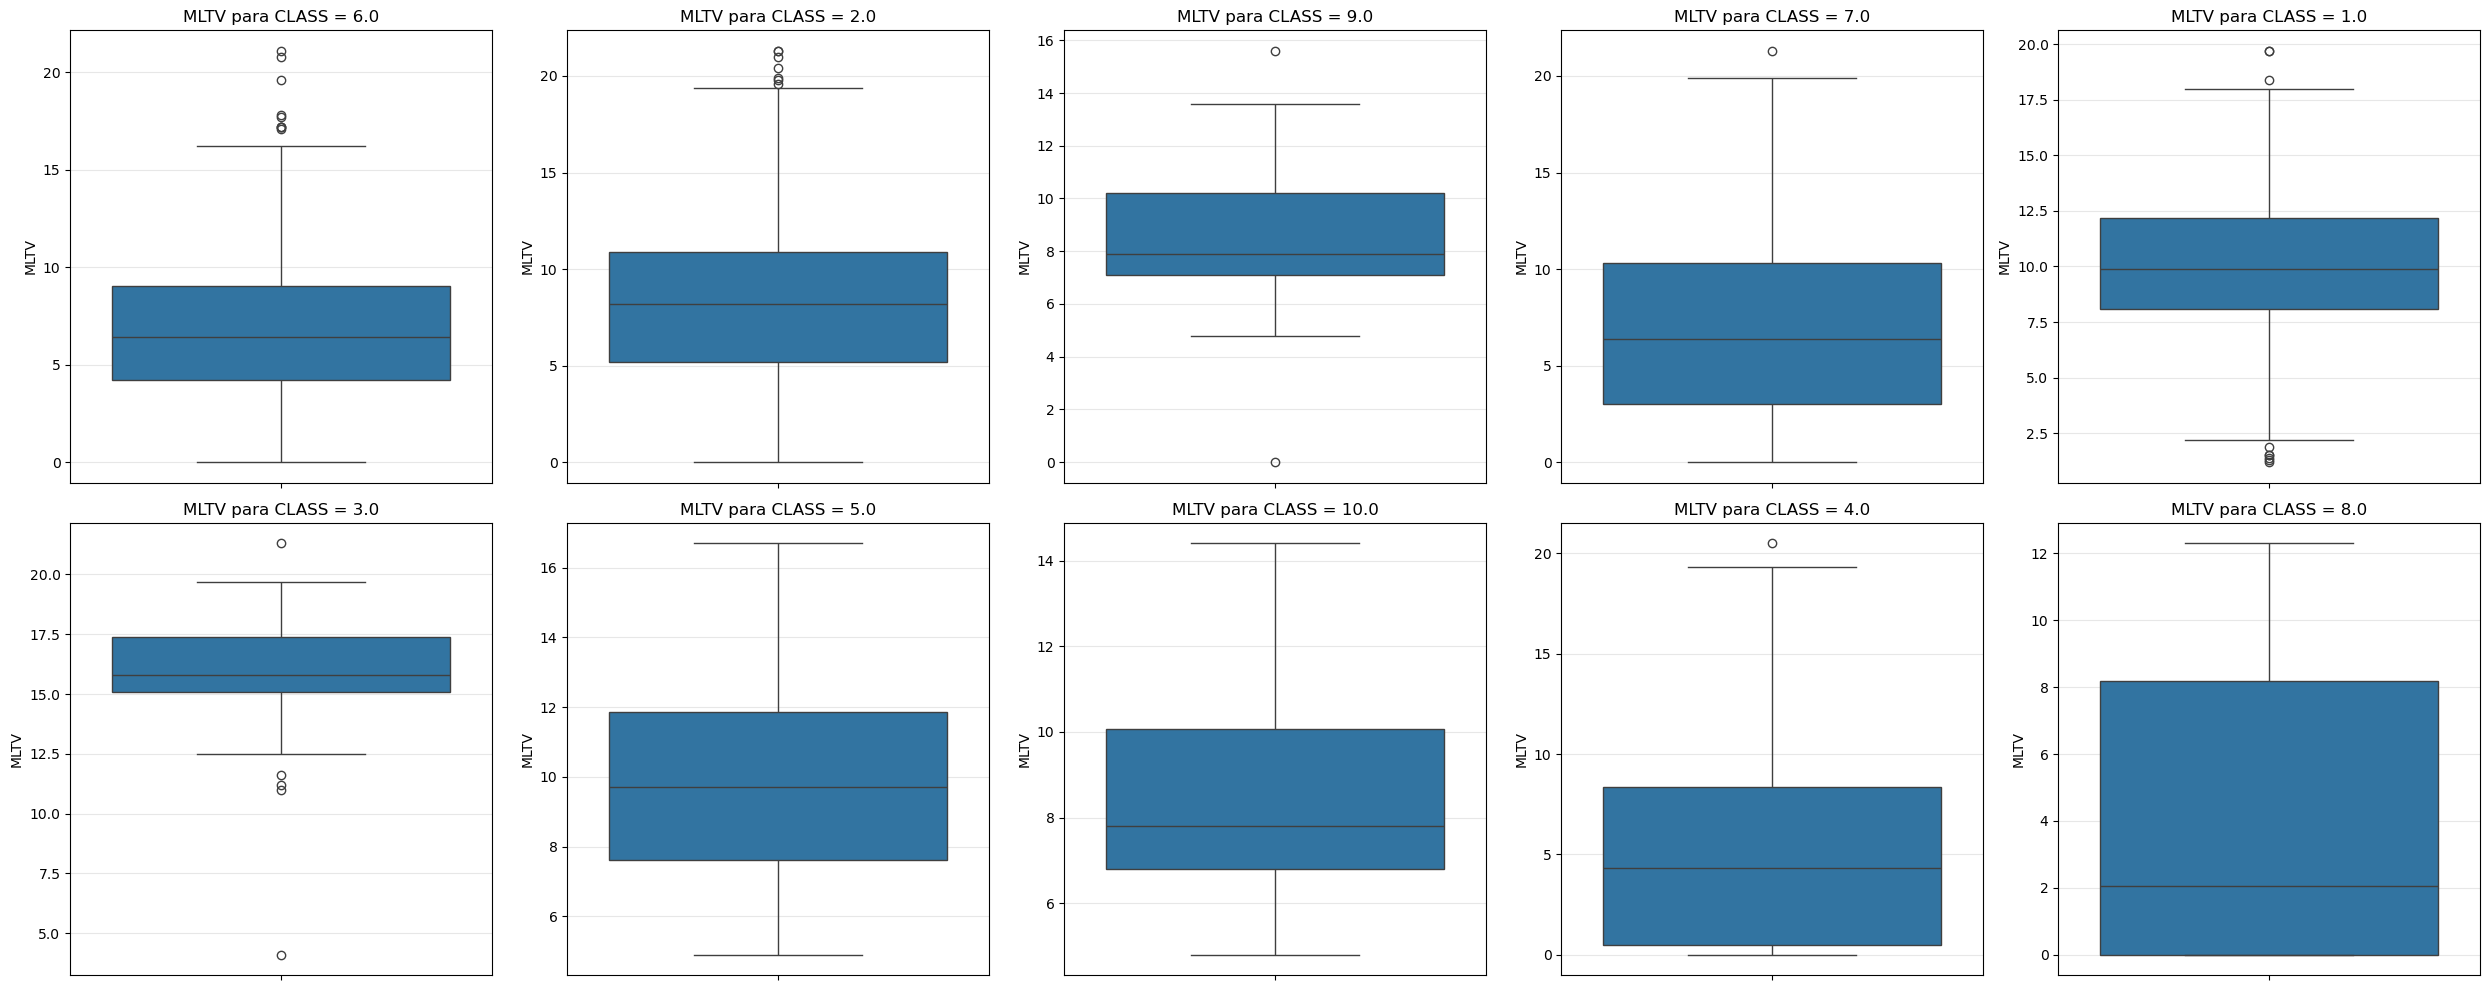

In [14]:
plot_boxplot_ctg(df_step3, col="MLTV",  hue="CLASS")

Observaciones:

- La mediana de MLTV varía bastante entre clases, con algunas como CLASS 2.0 y 6.0 mostrando valores más altos que otras como CLASS 1.0 o 4.0.

- Hay clases con rangos más amplios y otras más compactas, lo que indica que la variabilidad de MLTV no es uniforme entre grupos.

- Esta comparación por CLASS permite identificar qué grupos tienen comportamientos distintos, lo que puede ser útil para ajustar análisis o modelos según el tipo de clase.

## Barras Horizontales: Ordenadas por frecuencia descendente

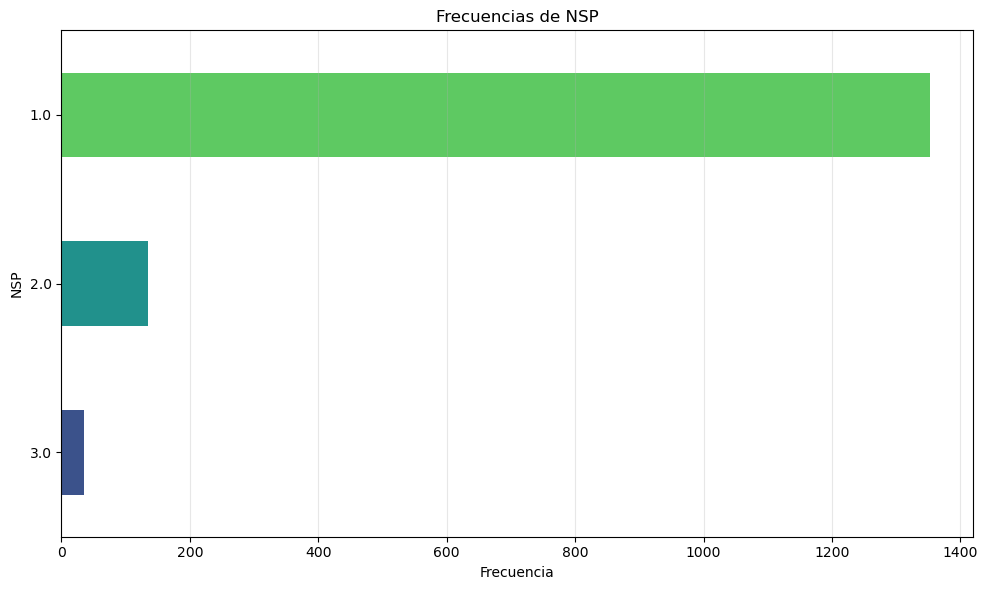

In [15]:
# 1. Frecuencia de NSP
plot_barh_ctg(df_step3, col="NSP")

Observaciones:

- NSP 1.0 es claramente el grupo más frecuente, con una diferencia muy marcada respecto a NSP 2.0 y 3.0.

- La baja presencia de NSP 3.0 podría limitar algunos análisis comparativos, especialmente si se requiere balance entre clases.

- Esta distribución sugiere que el dataset está desbalanceado, lo que conviene tener en cuenta si se aplican modelos de clasificación.

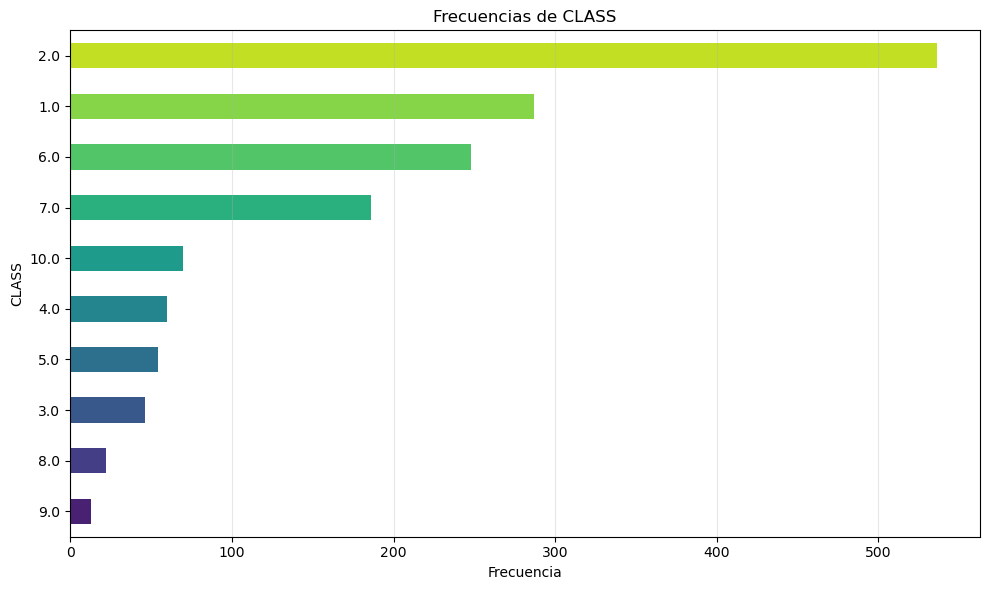

In [16]:
# 2. Frecuencia de CLASS
plot_barh_ctg(df_step3, col="CLASS")

Observaciones:

- CLASS 2.0 es el grupo más frecuente, seguido por CLASS 1.0 y CLASS 6.0; el resto tiene frecuencias mucho menores.

- Las clases 8.0 y 9.0 tienen muy pocos casos, lo que podría dificultar su análisis.

- Esta distribución muestra que el dataset está desbalanceado en cuanto a CLASS.

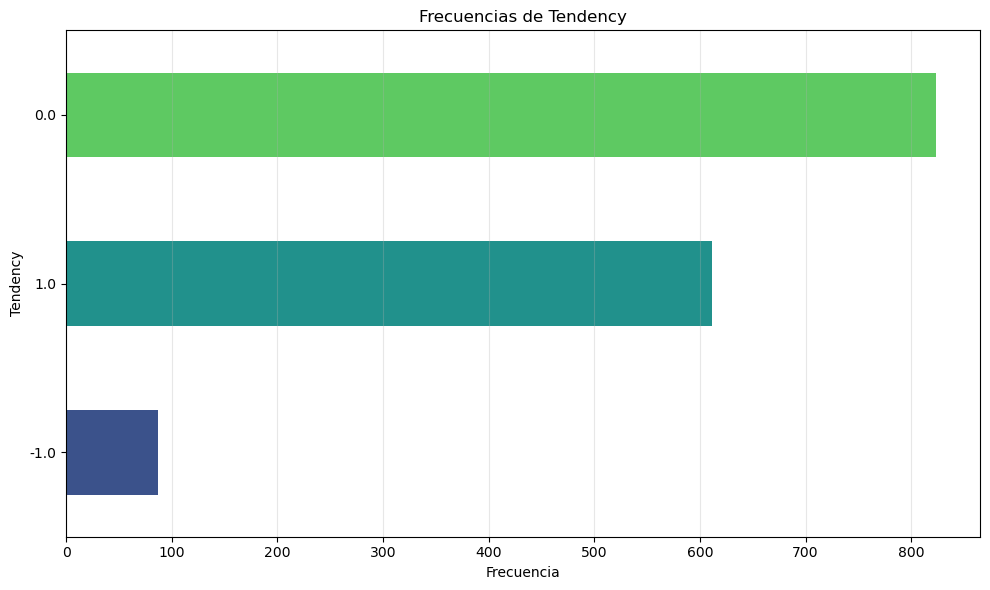

In [17]:

# 3. Frecuencia de Tendency (columna categórica ordinal)
plot_barh_ctg(df_step3, col="Tendency")

Observaciones:

- La mayoría de los casos tienen tendencia neutra (0.0), lo que indica que no hay inclinación marcada en la variable.

- Las tendencias positivas (1.0) son más frecuentes que las negativas (-1.0), aunque ambas están muy por debajo del grupo neutro.

- Esta distribución sugiere que la variable Tendency está centrada y con poco sesgo, lo que puede facilitar su uso en modelos sin necesidad de ajustes mayores.

## Líneas: Simular serie temporal (ordenar por índice o simular variable de tiempo)

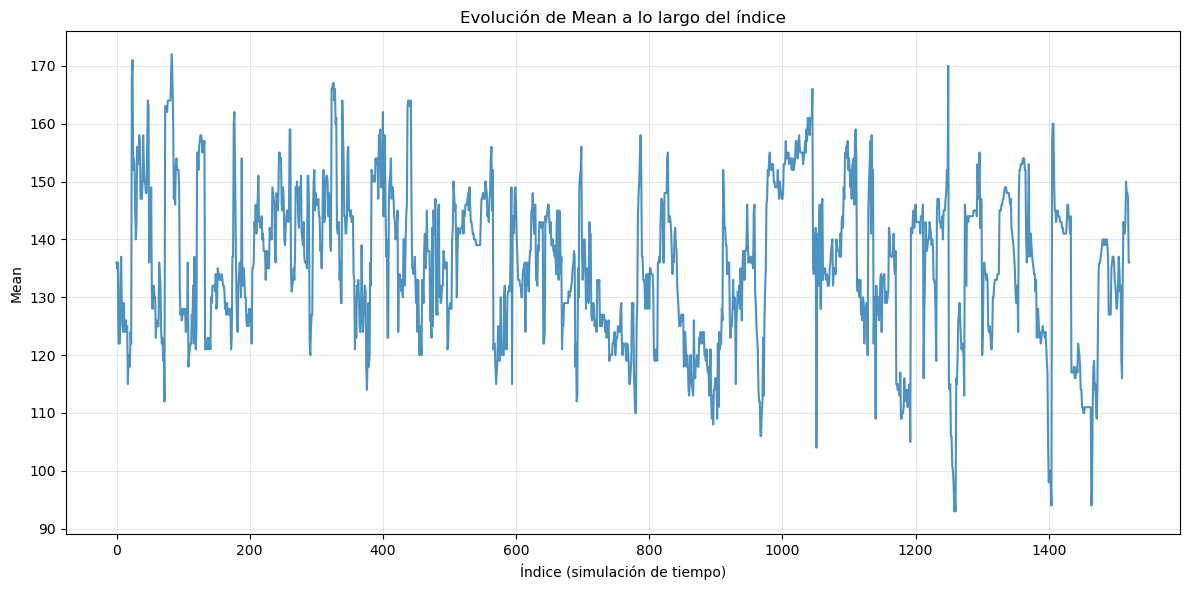

In [18]:
# Simulamos una serie temporal tomando el índice como "tiempo"
df_line = df_step3.sort_index().reset_index(drop=True)

# 1. Línea de Mean a lo largo de las observaciones
plot_line_ctg(df=df_line, col="Mean")

Observaciones:

- La variable Mean muestra bastante variación a lo largo del índice, con subidas y bajadas constantes.

- No se observa una tendencia clara, lo que sugiere que los valores cambian de forma irregular en el tiempo simulado.

- Esta gráfica es útil para detectar posibles patrones locales o zonas de mayor estabilidad, aunque en general el comportamiento es fluctuante.

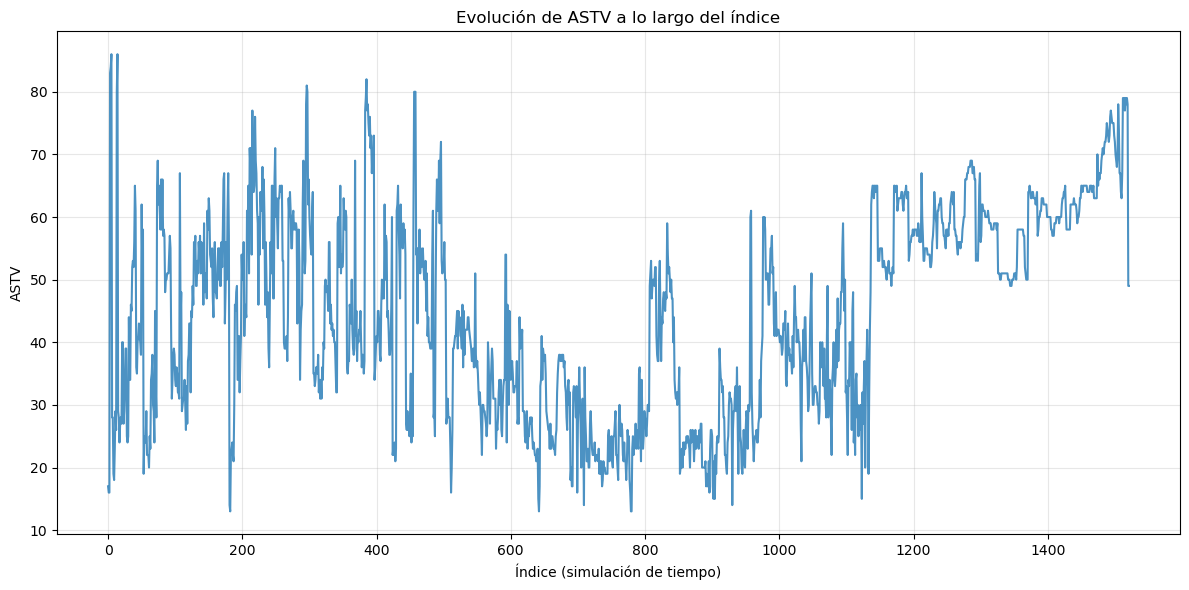

In [19]:
# 2. Línea de ASTV a lo largo de las observaciones
plot_line_ctg(df=df_line, col="ASTV")

Observaciones:

- La variable ASTV muestra variaciones constantes a lo largo del índice, con subidas y bajadas que se repiten en todo el recorrido.

- No hay una tendencia clara, aunque se observan zonas con mayor estabilidad y otras con cambios más bruscos.

- Esta gráfica permite identificar momentos de mayor actividad o irregularidad.

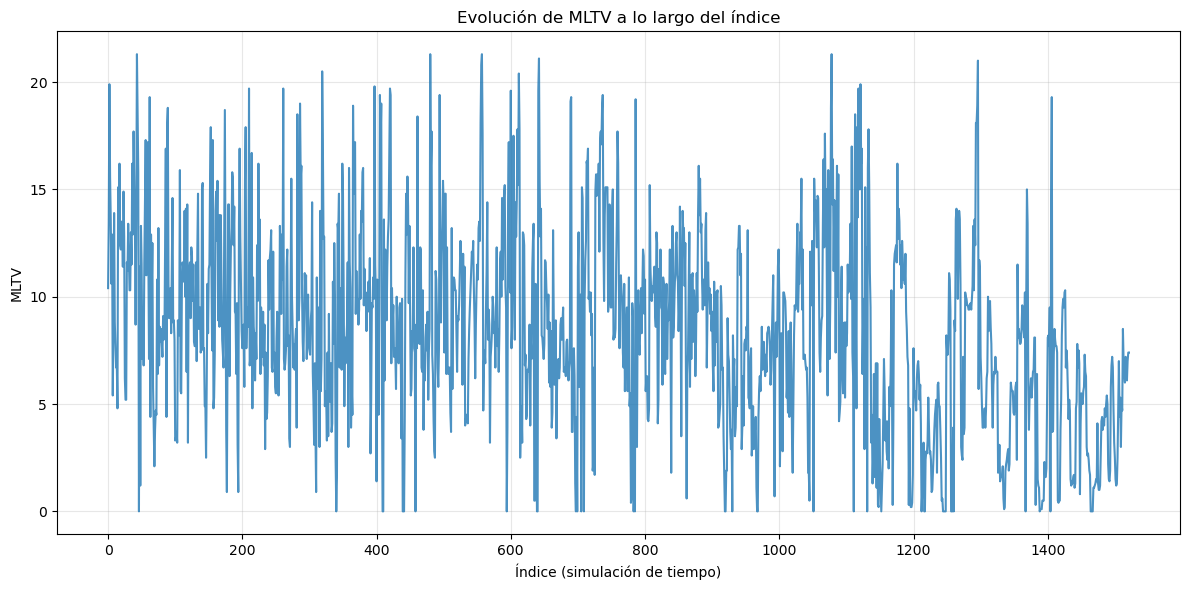

In [20]:
# 3. Línea de MLTV a lo largo de las observaciones
plot_line_ctg(df=df_line, col="MLTV")

Observaciones:

- La variable MLTV presenta muchas fluctuaciones a lo largo del índice, con subidas y bajadas constantes.

- No se aprecia una tendencia definida, aunque hay zonas con mayor estabilidad y otras más irregulares.

- Esta gráfica puede servir para detectar momentos de cambio o comportamientos atípicos, especialmente si se cruza con otras variables.

## Dot Plots: Comparación entre 2 grupos (overlay)

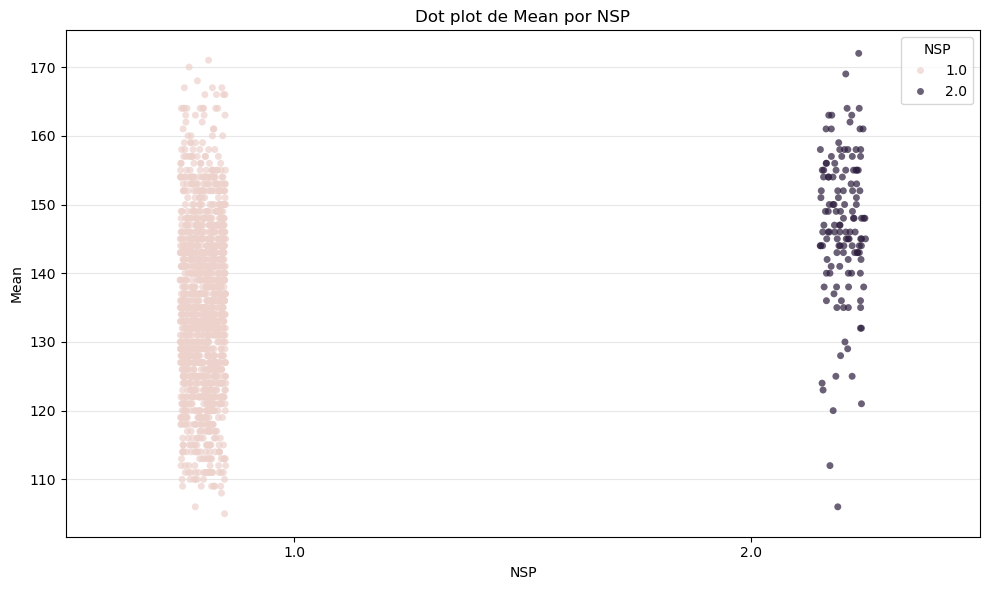

In [21]:
# Filtramos solo NSP = 1 y 2 para comparar mejor
df_dot = df_step3[df_step3["NSP"].isin([1, 2])]

# 1. Dot plot de Mean para NSP 1 vs 2
plot_dotplot_ctg(df=df_dot, col="Mean", hue="NSP")

Observaciones:

- Los valores de Mean para NSP 1.0 y 2.0 se agrupan en rangos similares, aunque NSP 2.0 parece tener una ligera concentración en valores más altos.

- No se observan patrones extremos ni outliers evidentes, lo que sugiere que ambos grupos tienen una distribución relativamente estable.

- Esta visualización permite comparar directamente la dispersión y concentración entre NSP 1.0 y 2.0, lo que puede ayudar a entender diferencias sutiles entre ambos.

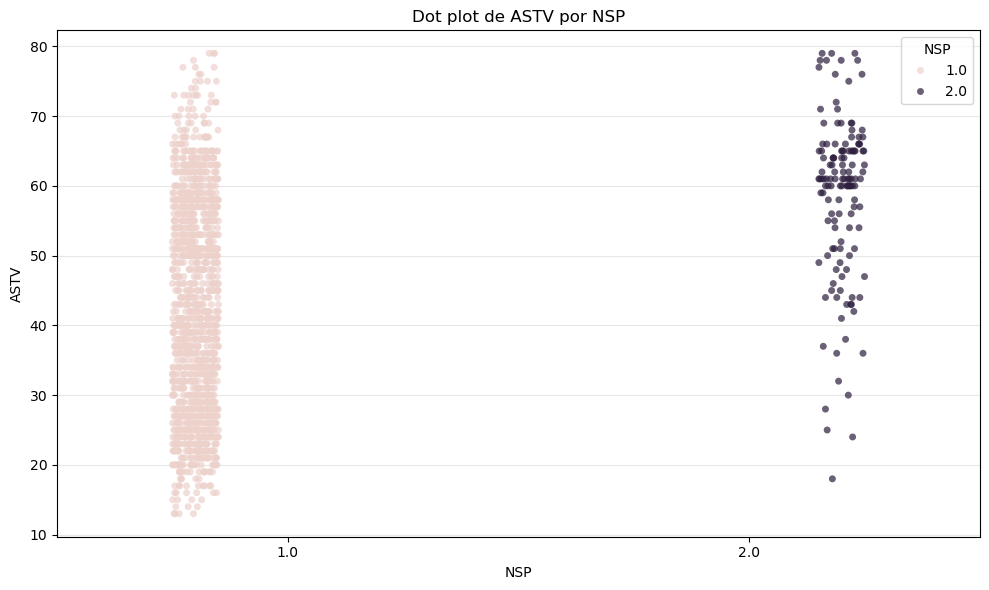

In [22]:
# 2. Dot plot de ASTV para NSP 1 vs 2
plot_dotplot_ctg(df=df_dot, col="ASTV", hue="NSP")

Observaciones:

- Los valores de ASTV para NSP 2.0 tienden a ser más altos que los de NSP 1.0, lo que sugiere mayor actividad en ese grupo.

- NSP 1.0 muestra más dispersión hacia valores bajos, mientras que NSP 2.0 se concentra en rangos medios-altos.

- Esta visualización permite comparar de forma directa cómo varía ASTV entre los dos grupos, lo que puede ser útil para entender diferencias funcionales o clínicas.

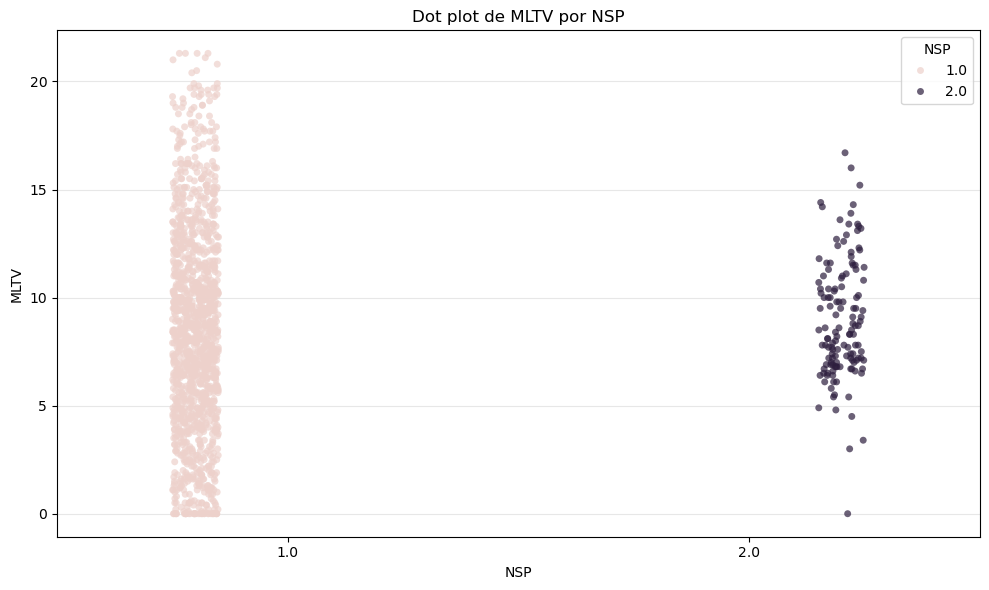

In [23]:
# 3. Dot plot de MLTV para NSP 1 vs 2
plot_dotplot_ctg(df=df_dot, col="MLTV", hue="NSP")

Observaciones:

- Los valores de MLTV para NSP 1.0 se extienden más hacia rangos altos, mientras que NSP 2.0 se concentra en valores medios.

- NSP 1.0 muestra mayor dispersión, lo que podría indicar más variabilidad dentro de ese grupo.

- Esta visualización permite comparar directamente cómo se comporta MLTV entre los dos tipos de NSP, lo que puede ser útil para detectar diferencias funcionales o ajustar análisis.

## Densidad: Múltiples clases con diferentes colores

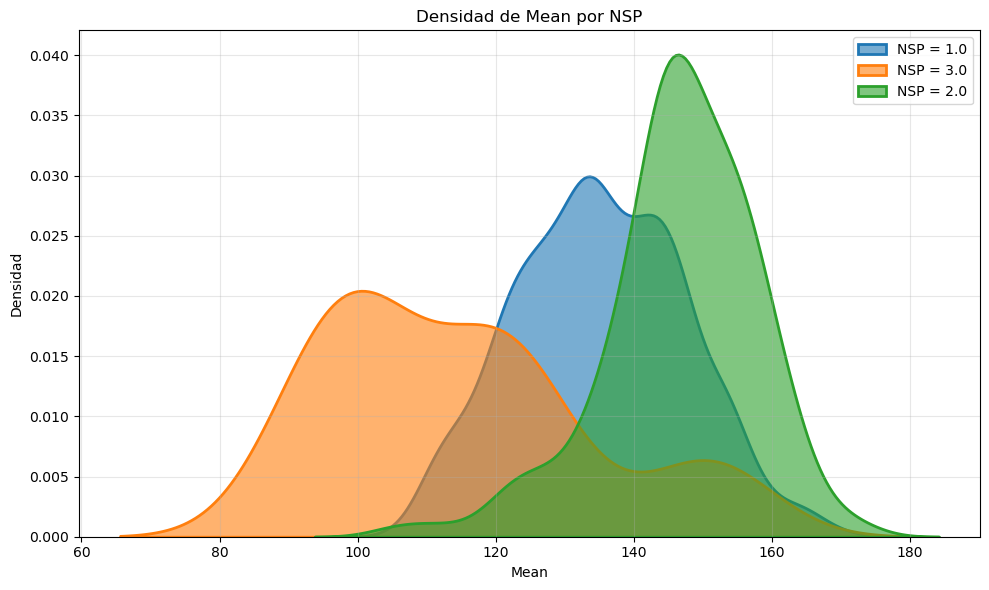

In [24]:
# 1. Densidad de Mean por NSP (1, 2, 3)
plot_density_ctg(df=df_step3, col="Mean", hue="NSP")

Observaciones:

- NSP 2.0 muestra una concentración de valores de Mean más alta que NSP 1.0, que se agrupa en rangos ligeramente más bajos.

- NSP 3.0 tiene una distribución más extendida y desplazada hacia la izquierda, lo que indica valores más bajos en promedio.

- Esta visualización permite comparar de forma clara cómo se comporta Mean según el tipo de NSP, lo que puede ayudar a entender diferencias entre grupos.

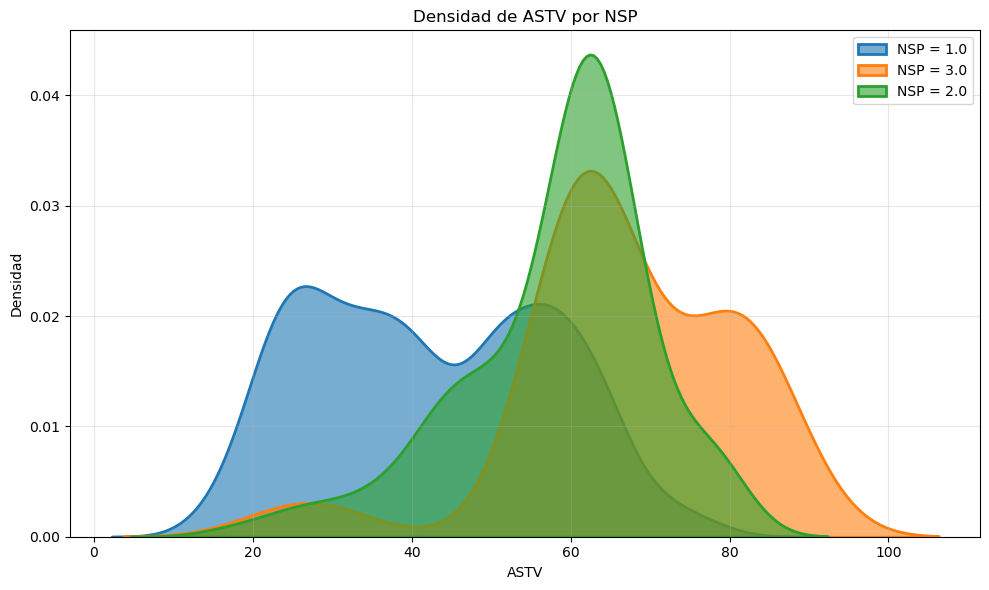

In [25]:
# 2. Densidad de ASTV por NSP
plot_density_ctg(df=df_step3, col="ASTV", hue="NSP")

Observaciones:

- NSP 2.0 y NSP 3.0 muestran concentraciones más altas de ASTV en rangos medios-altos, mientras que NSP 1.0 se agrupa en valores más bajos.

- La curva de NSP 1.0 está más extendida hacia la izquierda, lo que indica menor actividad en ese grupo.

- Esta visualización permite ver con claridad cómo varía ASTV según el tipo de NSP, lo que puede ser útil para entender diferencias funcionales entre los grupos.

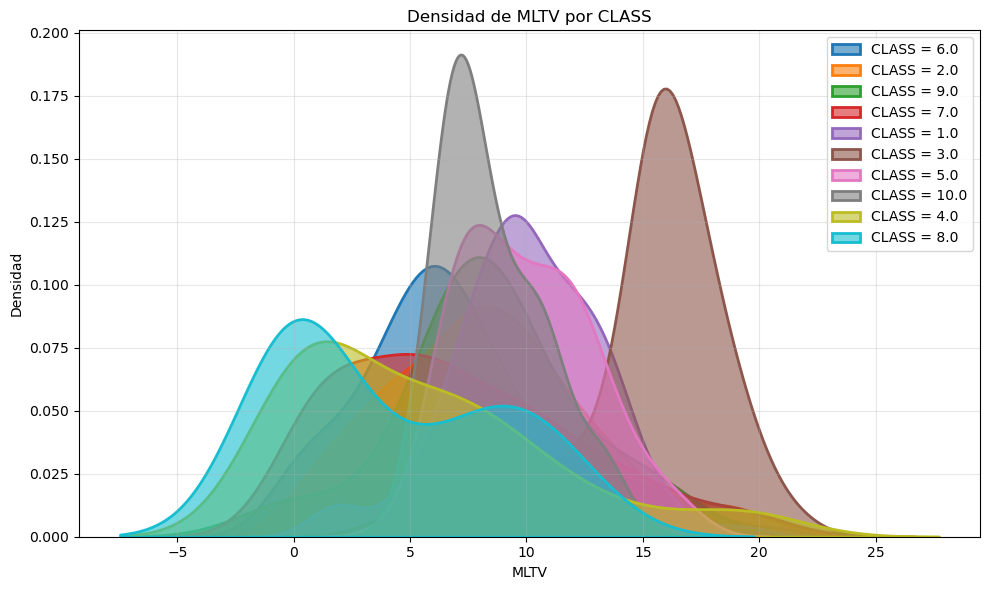

In [26]:
# 3. Densidad de MLTV por CLASS (1–10)
plot_density_ctg(df=df_step3, col="MLTV", hue="CLASS")

Observaciones:

- Las curvas de densidad muestran que MLTV tiene distribuciones distintas según la clase, aunque varias se solapan en rangos similares.

- Algunas clases como CLASS 2.0 y 6.0 presentan picos más definidos, mientras que otras tienen distribuciones más planas o dispersas.

- Esta visualización permite identificar qué clases tienen comportamientos más marcados en MLTV, lo que puede ser útil para segmentar o ajustar modelos.

## Violín: Overlay con swarmplot

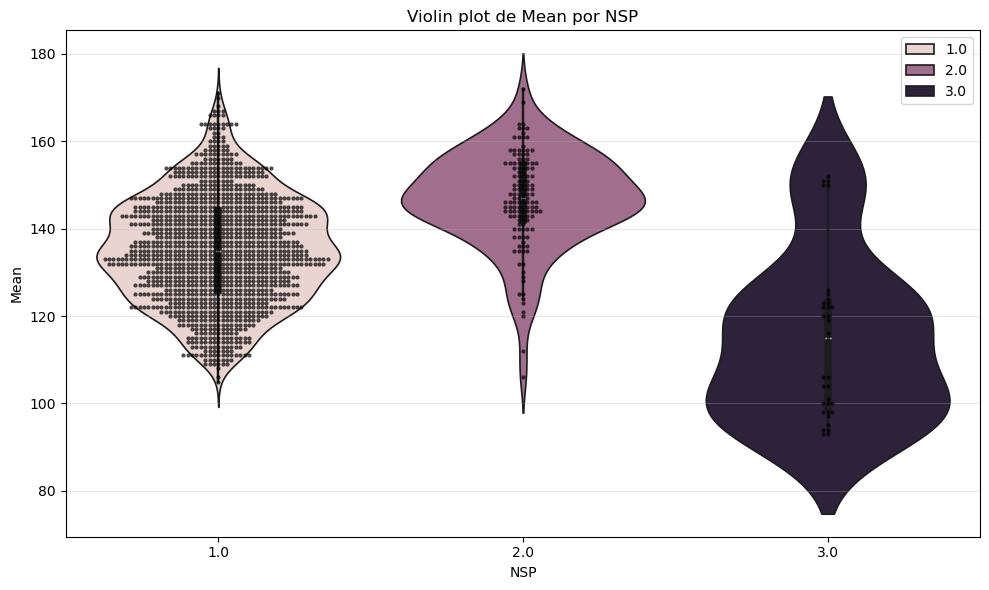

In [27]:
# 1. Violín de Mean por NSP (con overlay de puntos)
plot_violin_ctg(df=df_step3, col="Mean", hue="NSP")

Observaciones:

- NSP 2.0 presenta una distribución más concentrada en valores altos de Mean, mientras que NSP 1.0 y 3.0 tienen mayor dispersión.

- NSP 3.0 muestra una densidad más extendida hacia valores bajos, lo que sugiere menor actividad promedio en ese grupo.

- Esta visualización permite comparar tanto la forma como la concentración de los datos entre grupos, lo que puede ser útil para detectar diferencias funcionales o ajustar modelos.

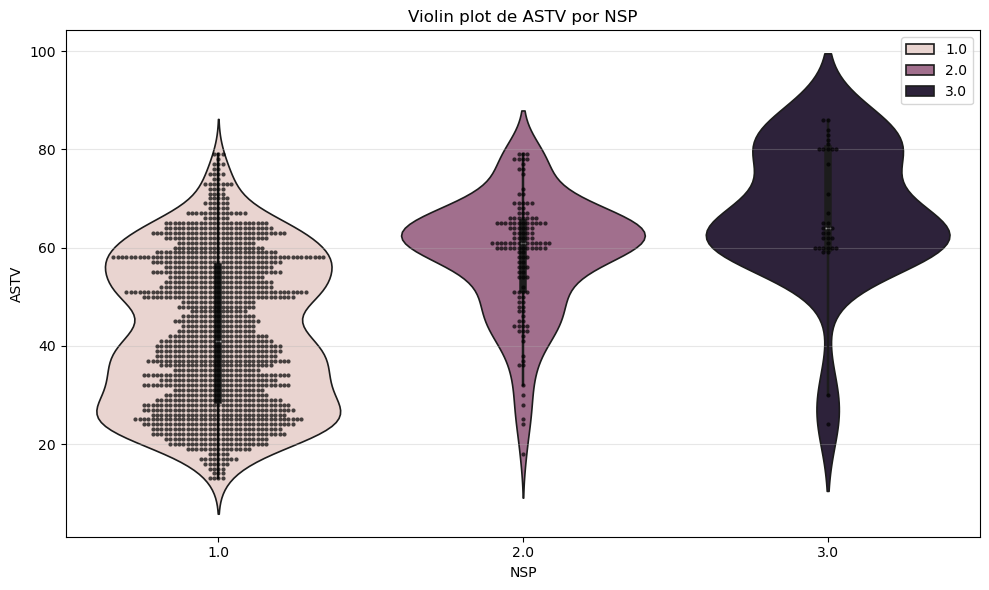

In [28]:
# 2. Violín de ASTV por NSP
plot_violin_ctg(df=df_step3, col="ASTV", hue="NSP")

Observaciones:

- NSP 2.0 presenta una distribución más concentrada en valores altos de ASTV, mientras que NSP 1.0 se agrupa en rangos más bajos.

- NSP 3.0 muestra una forma más extendida, con dispersión tanto hacia valores bajos como medios.

- Esta visualización permite comparar la forma, concentración y dispersión de ASTV entre los tres grupos, lo que puede ser útil para entender diferencias funcionales o ajustar modelos.

/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


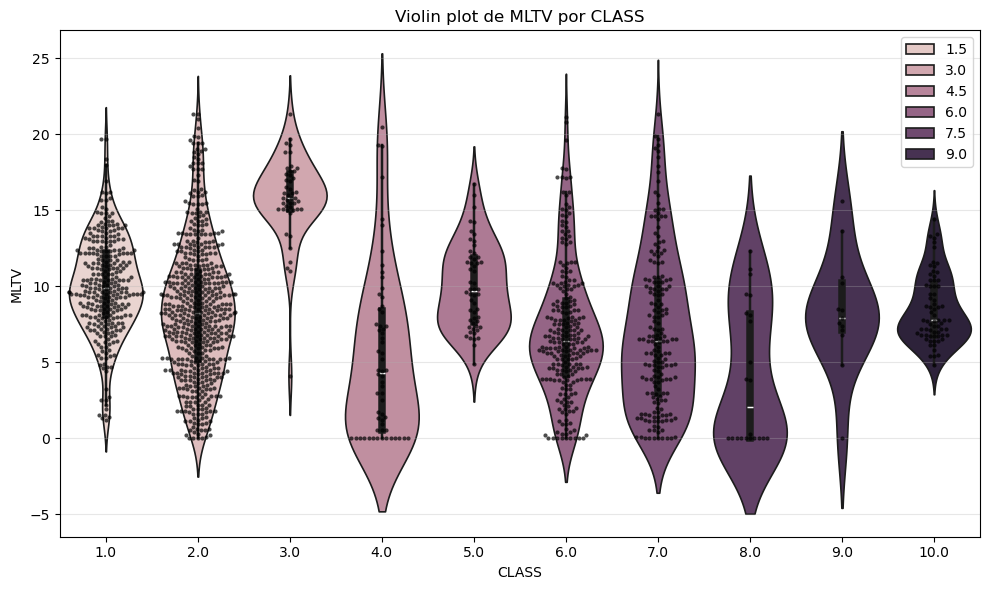

In [29]:
# 3. Violín de MLTV por CLASS
plot_violin_ctg(df=df_step3, col="MLTV", hue="CLASS")

Observaciones:

- Las distribuciones de MLTV varían entre clases, con algunas como CLASS 2.0 y 6.0 mostrando formas más concentradas y otras más dispersas.

- Varias clases comparten rangos similares de MLTV, aunque con densidades distintas, lo que sugiere comportamientos parcialmente solapados.

- Esta visualización permite comparar la forma, concentración y dispersión de MLTV entre clases.

## Heatmap: Correlación + anotaciones y selección de método ('pearson','spearman')

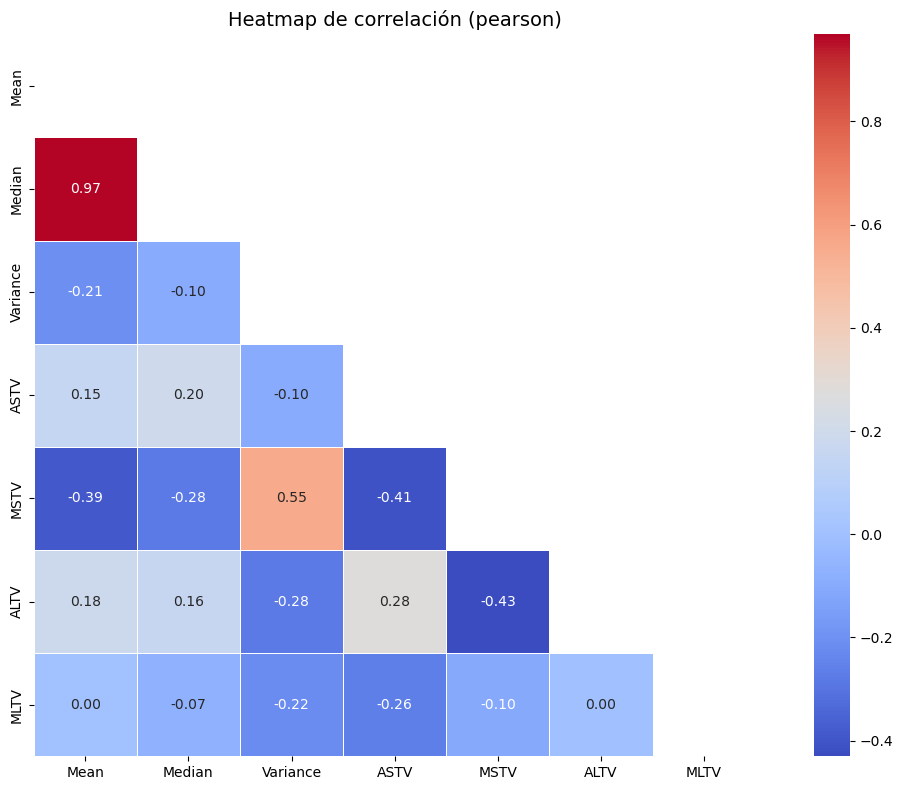

In [30]:
# Subconjunto de variables continuas relevantes
cols_corr_1 = ["Mean", "Median", "Variance", "ASTV", "MSTV", "ALTV", "MLTV"]
cols_corr_2 = ["Width", "Min", "Max", "Nmax", "Nzeros", "Mean", "Variance"]

# 1. Heatmap de correlación (Pearson)
plot_heatmap_ctg(df=df_step3, cols=cols_corr_1, method="pearson")

Observaciones:

- Mean y Median tienen una correlación muy alta (0.97), lo que indica que ambas variables capturan de forma similar la tendencia central.

- Variance se relaciona negativamente con Mean, Median y ALTV, pero positivamente con MSTV, lo que sugiere que la variabilidad está más conectada con ciertos tipos de variación temporal.

- ASTV y MSTV tienen una correlación negativa (-0.41), lo que podría indicar que cuando una aumenta, la otra tiende a disminuir.

- MLTV muestra correlaciones muy bajas con casi todas las variables, lo que sugiere que su comportamiento es más independiente dentro del conjunto.

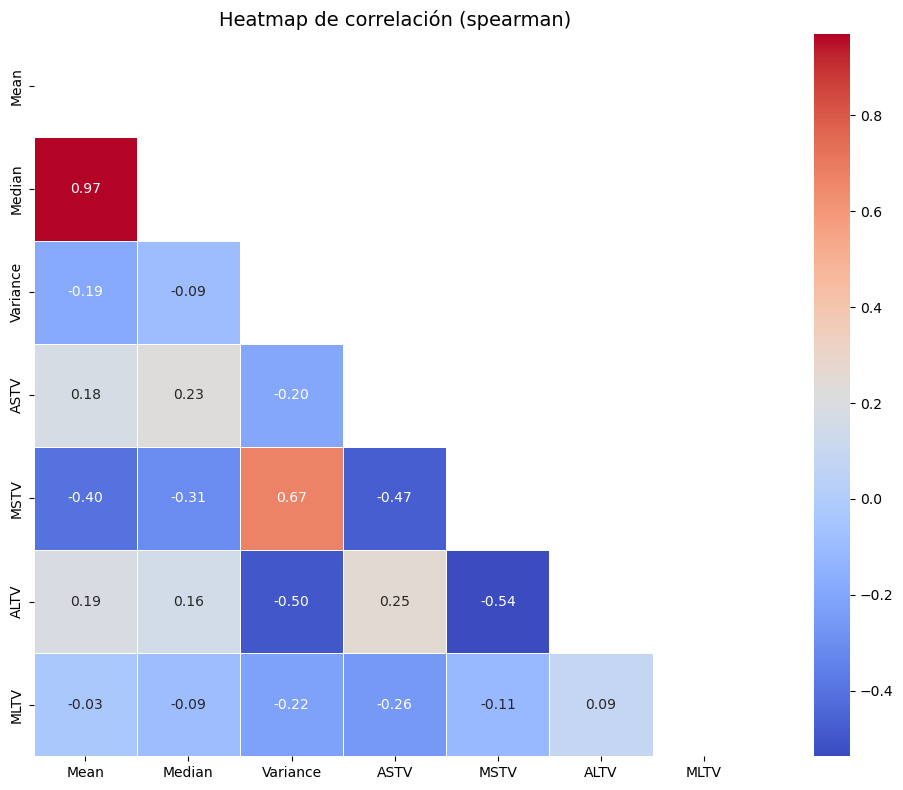

In [31]:
# 2. Heatmap de correlación (Spearman) sobre el mismo subconjunto
plot_heatmap_ctg(df=df_step3, cols=cols_corr_1, method="spearman")

Observaciones:

- Mean y Median mantienen una correlación muy alta (0.97), lo que confirma que ambas reflejan de forma consistente la tendencia central.

- Variance se relaciona positivamente con MSTV (0.67) y negativamente con ALTV (-0.50), lo que sugiere que la variabilidad está más conectada con ciertos tipos de variación temporal.

- ASTV y MSTV tienen una correlación negativa moderada (-0.47), lo que indica que tienden a moverse en direcciones opuestas.

- MLTV sigue mostrando correlaciones débiles con el resto de variables, lo que refuerza su carácter más independiente dentro del conjunto.

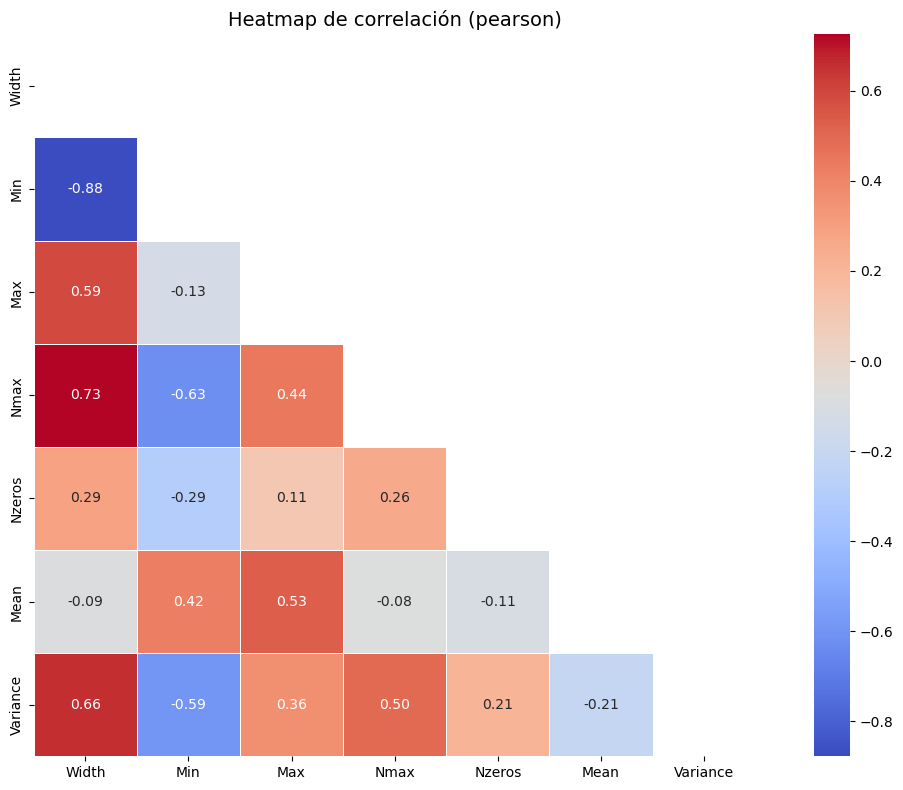

In [32]:
# 3. Heatmap Pearson sobre otro subconjunto de variables de histograma
plot_heatmap_ctg(df=df_step3, cols=cols_corr_2, method="pearson")

Observaciones:

- Mean y Median tienen una correlación muy alta (0.97), lo que confirma que ambas reflejan de forma consistente la tendencia central.

- Variance se relaciona negativamente con Mean, Median y ALTV, pero positivamente con MSTV, lo que sugiere que la variabilidad está más conectada con ciertos tipos de fluctuación temporal.

- ASTV y MSTV presentan una correlación negativa moderada (-0.41), lo que indica que tienden a comportarse de forma opuesta.

- MLTV muestra correlaciones cercanas a cero con la mayoría de las variables, lo que refuerza su independencia dentro del conjunto.

# Construcción de una Librería Python

## Crear un módulo ctg_viz/ con submódulos

### Estructura del proyecto

```text
ctg_viz/
├── __init__.py
├── preprocessing.py
├── categorization.py
├── utils.py
└── plots/
    ├── __init__.py
    ├── histograms.py
    ├── boxplots.py
    ├── bars.py
    ├── lines.py
    ├── dotplots.py
    ├── density.pyç
    ├── violin.py
    ├── heatmap.py
    └── before_after.py

tests/
├── __init__.py
├── test_preprocessing.py
├── test_categorization.py
└── test_utils.py

Practica_3.ipynb
README.md
requirements.txt
setup.py
streamlit_app.py
CTG.csv

```

# Recomendaciones analíticas

- La mayoría de las columnas tienen muy pocos valores nulos, por lo que la imputación realizada ayuda a dejar el dataset completo sin modificar de forma importante la información original.

- La variable DR no aporta información porque siempre toma el mismo valor, por lo que puede eliminarse en análisis posteriores.

- Algunas columnas contienen muchos valores iguales a cero. Esto sugiere que podrían estar funcionando más como indicadores o categorías, por lo que conviene revisarlas con especial atención.

- El tratamiento de outliers con IQR redujo el número de registros, pero dejó distribuciones más estables y limpias, lo que facilita interpretar los valores sin ruido extremo.

- Los heatmaps mostraron relaciones claras entre algunas variables importantes (Mean, Median, Variance, ASTV). Esto ayuda a entender qué columnas están muy relacionadas entre sí.

- Las variables de salida (NSP y CLASS) están desbalanceadas, por lo que si se quisiera continuar con análisis más avanzados (como predicción), habría que tomar en cuenta este desbalance.

# Bonus (para sobresaliente)

## - Integración con Streamlit para mostrar visualizaciones interactivas

## - Empaquetar el módulo con setup.py y publicarlo localmente

## - Crear visualizaciones con Plotly o Altair además de matplotlib / seaborn


In [33]:
from ctg_viz.plots import plot_histogram_plotly_ctg

fig = plot_histogram_plotly_ctg(df_step3, "Mean")
fig.show()